# Importing Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,  StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [2]:
df=pd.read_csv('D:/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Checking Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Statistical Summary

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# Checking Null Values

In [7]:
#check null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Checking Duplicate Values

In [8]:
df.duplicated().sum()

763

# Removing Duplicated Values

In [9]:
#drop duplicated values
df_new=df.drop_duplicates()
df_new.duplicated().sum()

0

# Count Plots for every Column

<Axes: xlabel='fuel', ylabel='count'>

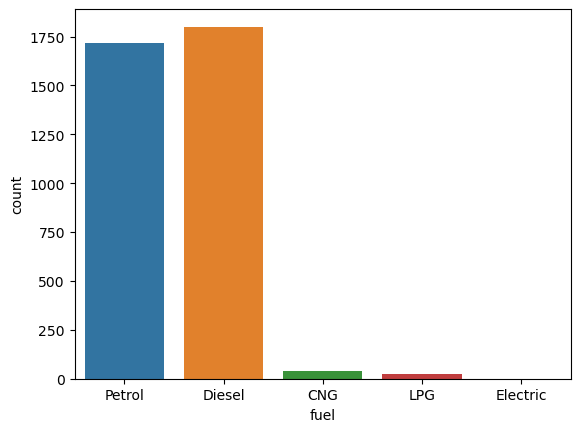

In [11]:
sns.countplot(data=df_new, x='fuel')

<Axes: xlabel='seller_type', ylabel='count'>

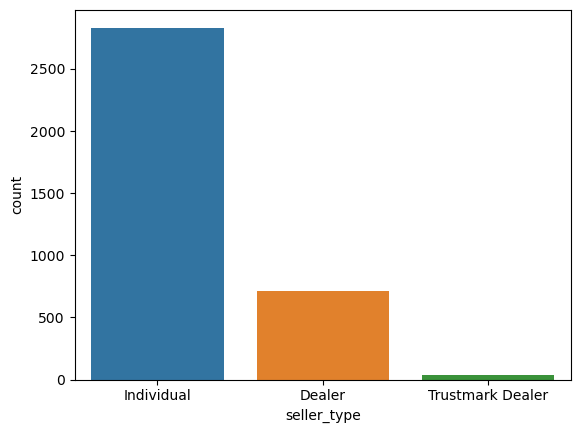

In [12]:
sns.countplot(data=df_new, x='seller_type')

<Axes: xlabel='transmission', ylabel='count'>

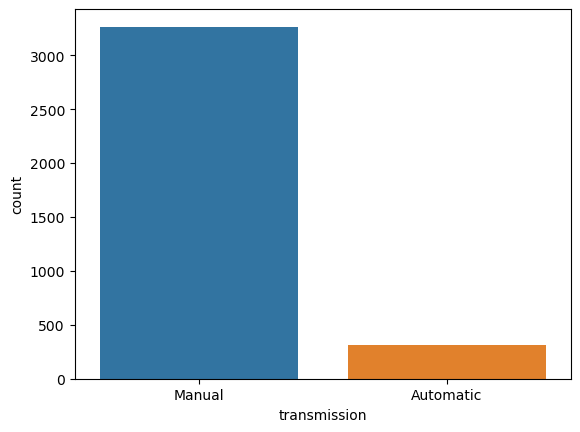

In [13]:
sns.countplot(data=df_new, x='transmission')

<Axes: xlabel='owner', ylabel='count'>

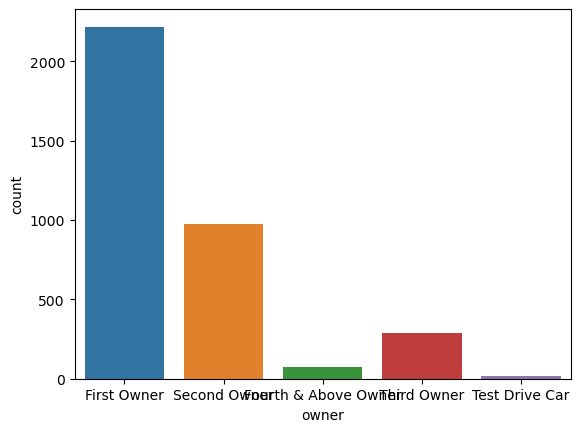

In [14]:
sns.countplot(data=df_new, x='owner')

# Handling Categorical Values


In [16]:
le = LabelEncoder()

In [17]:
#fetch categorical values
categories = df.select_dtypes(include=['object'])
categories.columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [18]:
for categorie in categories:
    df_new[categorie]=le.fit_transform(df_new[categorie])

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_7448\2282232191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[categorie]=le.fit_transform(df_new[categorie])
C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_7448\2282232191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[categorie]=le.fit_transform(df_new[categorie])
C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_7448\2282232191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
df_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


# Checking Correlation 

In [20]:
df_new.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,1.000000,-0.048934,-0.067094,0.134967,-0.080758,0.122706,0.073728,0.019102
year,-0.048934,1.000000,0.424260,-0.417490,-0.114040,-0.119385,-0.116692,-0.415832
selling_price,-0.067094,0.424260,1.000000,-0.187359,-0.261979,-0.153182,-0.486269,-0.213130
km_driven,0.134967,-0.417490,-0.187359,1.000000,-0.297611,0.115357,0.101387,0.290991
fuel,-0.080758,-0.114040,-0.261979,-0.297611,1.000000,0.031395,0.017071,-0.012783
seller_type,0.122706,-0.119385,-0.153182,0.115357,0.031395,1.000000,0.125991,0.176003
transmission,0.073728,-0.116692,-0.486269,0.101387,0.017071,0.125991,1.000000,0.060078
owner,0.019102,-0.415832,-0.213130,0.290991,-0.012783,0.176003,0.060078,1.000000


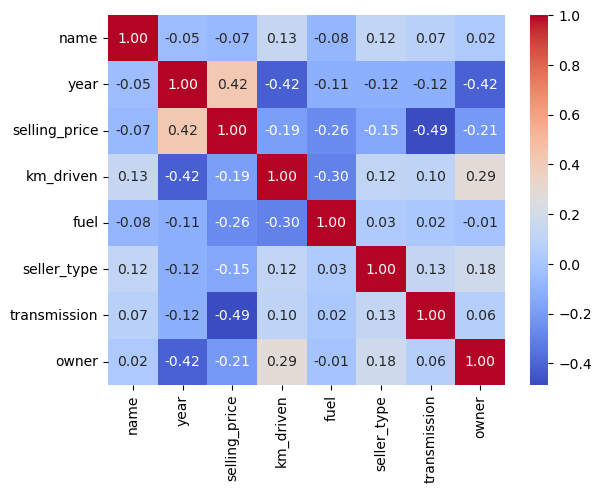

In [21]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [22]:
df_new=df_new.drop('name',axis='columns')
df_new.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


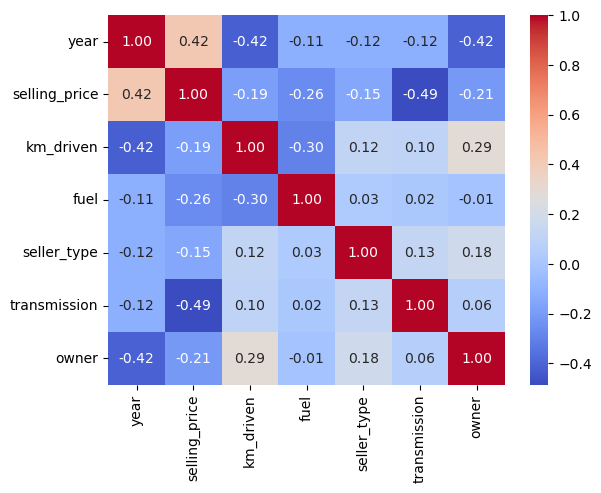

In [23]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Extracting Features

In [25]:
X=df_new.drop(columns=['selling_price'])
y=df_new['selling_price']

# Split Data for train and test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 ,random_state=2)

# Data Scalling

In [28]:
ss = StandardScaler()

In [29]:
X_trainS=ss.fit_transform(X_train)
X_testS=ss.fit_transform(X_test)

In [30]:
X_trainS.shape  ,    X_testS.shape

((2861, 6), (716, 6))

In [31]:
y_train.shape     ,   y_test.shape

((2861,), (716,))

# Model Evaluation Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(X_trainS, y_train)
print(mean_absolute_error(y_test,lr.predict(X_testS)))
print(mean_squared_error(y_test,lr.predict(X_testS)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(X_testS))))
print(r2_score(y_test,lr.predict(X_testS)))

211318.8708781856
188252325968.9921
433880.54343216645
0.38356630522475643


# Cross Validation

In [34]:
score=cross_val_score(lr,X_trainS, y_train, cv=5)
print(score)
print(score.mean())

[0.32226433 0.49737317 0.4842052  0.35893708 0.47391755]
0.42733946642209053


# Model Evaluation RandomForest

In [35]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(mean_absolute_error(y_test,rfr.predict(X_test)))
print(mean_squared_error(y_test,rfr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))
print(r2_score(y_test,rfr.predict(X_test)))

202143.94734715644
174718738478.94098
417993.70626714104
0.4278821419461064


# Cross Validation

In [36]:
score=cross_val_score(rfr,X_train, y_train, cv=5)
print(score)
print(score.mean())

[0.31941968 0.45774435 0.39392846 0.38161306 0.42118658]
0.39477842480669223


# Hyperparameter Tunning  RandomForestRegressor

# GridSearchCV

In [37]:
param_grid={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
}
grid_search_rf=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [38]:
grid_search_rf.best_params_    

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [39]:
 grid_search_rf.best_score_

0.5018659334277055